In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import modules.utils as tools

In [3]:
from scipy import io
import os
datapath = 'Data/'
v = io.loadmat(datapath + 'B0005.mat')

In [70]:
cycles = np.vstack(v['B0005'][0,0])
type(cycles)

numpy.ndarray

In [61]:
modules.utils.name()

True

In [68]:
charge_indices = tools.get_indices(cycles)

In [71]:
new_cycles = tools.capacity_vectorizer(tools.get_indices(cycles, is_charge=False), cycles)

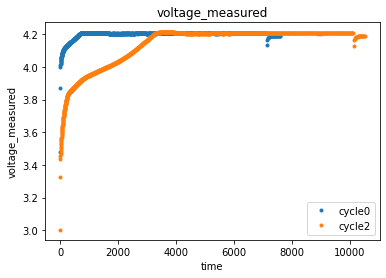

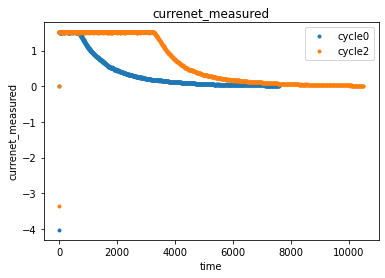

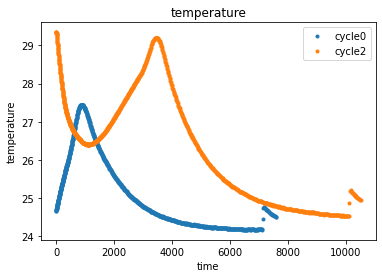

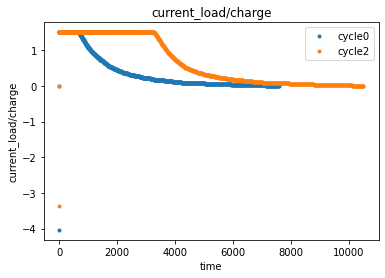

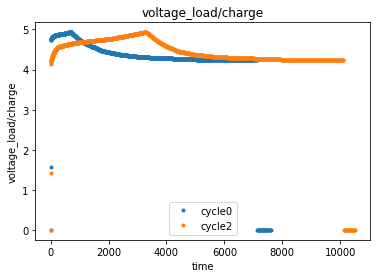

In [72]:
tools.cycle_plotter(new_cycles, charge_indices[:2])